###  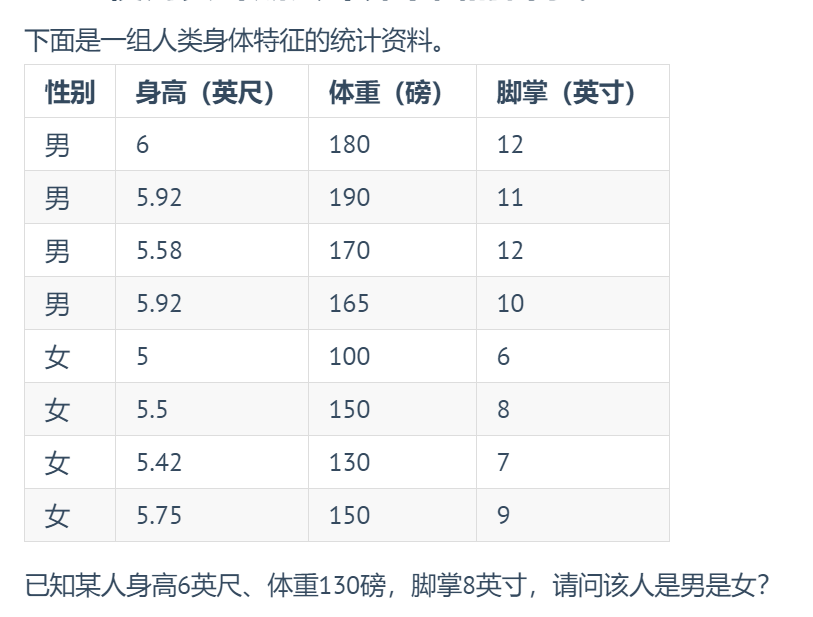

In [68]:
#  数据的第一行必须为类型判别的特征
data = '''
性别 : 男|男|男|男|女|女|女|女
身高（英尺） : 6|5.92|5.58|5.92|5|5.5|5.42|5.75
体重（磅） : 180|190|170|165|100|150|130|150
脚掌（英寸）: 12|11|12|10|6|8|7|9
'''
x = (6, 130, 8)   #-->预测y

In [7]:
resolution_data = {}
for e  in data.split('\n'):
    if e.strip() == '' :continue
    key, values = e.split(':') # ' 感冒|过敏|脑震荡|感冒|过敏|感冒|脑震荡|过敏'
    resolution_data[key.strip()] = [e.strip() for e in values.split('|')]

In [55]:
resolution_data

{'性别': ['男', '男', '男', '男', '女', '女', '女', '女'],
 '身高（英尺）': ['6', '5.92', '5.58', '5.92', '5', '5.5', '5.42', '5.75'],
 '体重（磅）': ['180', '190', '170', '165', '100', '150', '130', '150'],
 '脚掌（英寸）': ['12', '11', '12', '10', '6', '8', '7', '9']}

$$ \lambda $$
$$ \alpha $$

In [165]:
# 参数
begin_resolution_data = list(resolution_data.values())
judge = begin_resolution_data[0]
K = len(set(judge))
j = len(resolution_data) - 1
Sj = getSj(begin_resolution_data) 
𝜆 = 1 

{'女', '男'}

In [124]:
def getSj(begin_resolution_data = []):
    Sj = []
    for e in begin_resolution_data[1:]:
        Sj.append(len(set(e)))
    return Sj

In [125]:
def prior(judge = []):  # 先验概率 P(Y)
    pdict = {}
    for value in set(judge):
        pdict[value] = ((judge.count(value) + 𝜆) / (len(judge) + K * 𝜆))
    return   pdict

In [126]:
y_prior = prior(judge)
y_prior

{'女': 0.5, '男': 0.5}

In [159]:
def likelihood(x, y_name, begin_resolution_data = {}): # 似然概率 P(X|Y), 
    ldict = {}
    for i in range(j):
        x_count = 0
        for k in range(len(judge)):
            if judge[k] == y_name and begin_resolution_data[i+1][k] == str(x[i]):
                x_count += 1
        ldict['P(x{}={}|y={})'.format(i + 1, x[i], y_name)] = (x_count + 𝜆) / (judge.count(y_name) + Sj[i] * 𝜆)
    return ldict

In [193]:
def result_merge(judge = [], y_prior = {}):
    result_lists = []
    for e in set(judge):
        ldict = likelihood(x, e , begin_resolution_data)
        ldict_expand = ldict.copy()
        ldict_expand['P(y={})'.format(e)] = y_prior[e]
        result_lists.append(ldict_expand)
    return  result_lists

In [226]:
result_lists = result_merge(judge, y_prior)
list(result_lists[0].keys())[-1].split('=')[-1].strip('\)')

'女'

In [229]:
def calculate(result_lists = []):
    result_dict = {}
    for elements in result_lists:
        classification = list(elements.keys())[-1].split('=')[-1].strip('\)')
        p = 1
        for e in elements.values():
            p *= float(e)
        result_dict[classification] =  p
    return result_dict

In [232]:
cal_result = calculate(result_lists)

In [246]:
def compare(cal_result = {}):
    result_k = ''
    result_v_max = 0
    for es in list(cal_result.items()):  # es为tuple类型
        v = es[1]
        if v > result_v_max:
            result_v_max = v
            result_k = es[0]
    return result_k

In [247]:
last_result = compare(cal_result)

In [251]:
last_result

'女'